# 1. Introducción a los espacios de color

* RGB: Representa una imagen como una combinación de rojo, verde y azul.
* Grayscale: Representa una imagen con un solo canal de intensidad, desde el negro al blanco.
* HSV: Representa una imagen en términos de tono (Hue), saturación (Saturation) y valor (Value).

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2. Conversión de espacios de color con OpenCV

In [ ]:
# Leer una imagen a color (RGB por defecto en OpenCV)
imagen_rgb = cv2.imread('/content/drive/MyDrive/Clases/IMAGEN/007/TEO/Imagenes/messi.jpg')
imagen_rgb = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB) # Convertir de BGR a RGB para matplotlib

Text(0.5, 1.0, 'RGB')

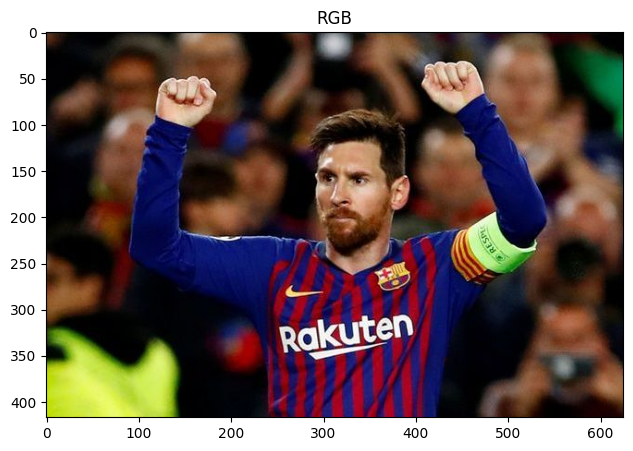

In [ ]:
# Mostrar las imágenes
plt.figure(figsize=(10, 5))
plt.imshow(imagen_rgb)
plt.title('RGB')

In [ ]:
# Convertir a escala de grises
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'Grayscale')

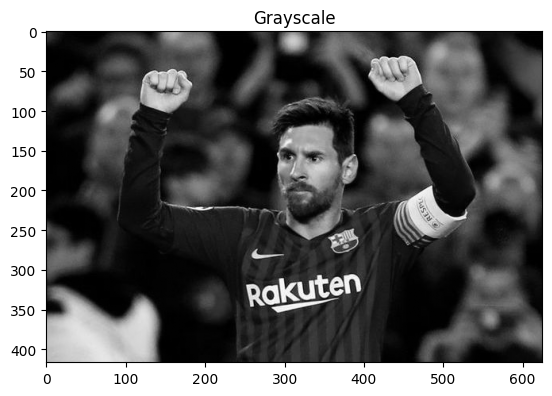

In [ ]:
plt.imshow(imagen_gris, cmap='gray')
plt.title('Grayscale')

In [ ]:
# Convertir a HSV
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

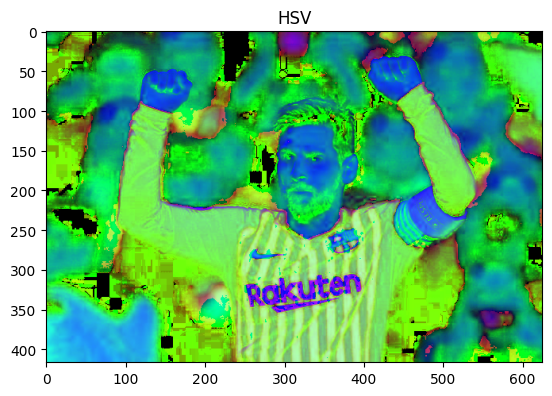

In [ ]:
plt.imshow(imagen_hsv)
plt.title('HSV')
plt.show()

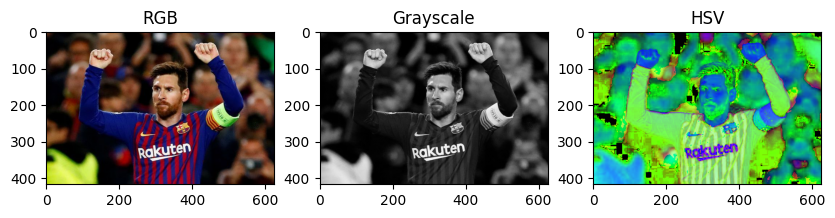

In [ ]:
# Mostrar las imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen_rgb)
plt.title('RGB')
plt.subplot(1, 3, 2)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Grayscale')
plt.subplot(1, 3, 3)
plt.imshow(imagen_hsv)
plt.title('HSV')
plt.show()

# 3. Manipulación de canales de color

In [ ]:
# Extraer los canales de color
r, g, b = cv2.split(imagen_rgb)
h, s, v = cv2.split(imagen_hsv)

In [ ]:
# Crear imágenes con un solo canal
imagen_r = cv2.merge([r, np.zeros_like(g), np.zeros_like(b)])
imagen_g = cv2.merge([np.zeros_like(r), g, np.zeros_like(b)])
imagen_b = cv2.merge([np.zeros_like(r), np.zeros_like(g), b])

imagen_h = cv2.merge([h, np.zeros_like(s), np.zeros_like(v)])
imagen_s = cv2.merge([np.zeros_like(h), s, np.zeros_like(v)])
imagen_v = cv2.merge([np.zeros_like(h), np.zeros_like(s), v])

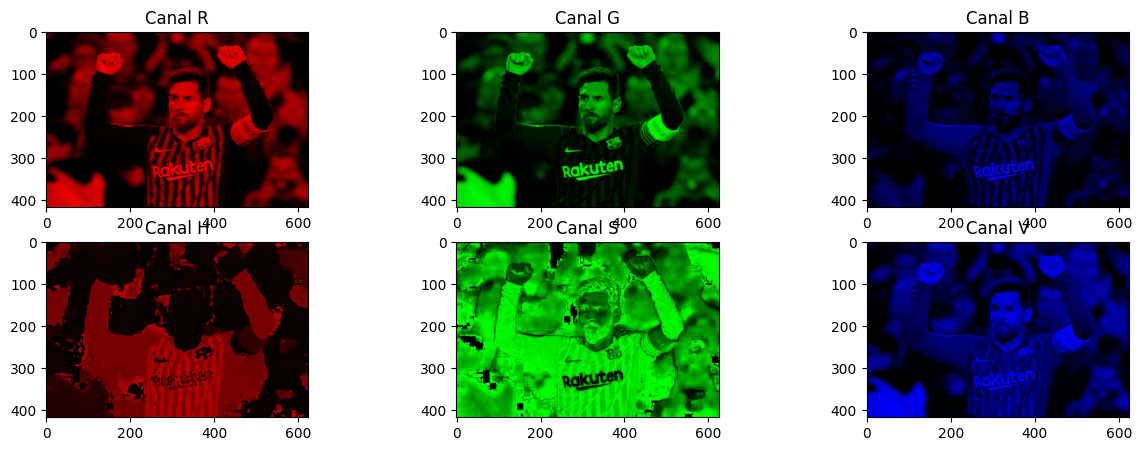

In [ ]:
# Mostrar los canales
plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.imshow(imagen_r)
plt.title('Canal R')
plt.subplot(2, 3, 2)
plt.imshow(imagen_g)
plt.title('Canal G')
plt.subplot(2, 3, 3)
plt.imshow(imagen_b)
plt.title('Canal B')
plt.subplot(2, 3, 4)
plt.imshow(imagen_h, cmap='hsv')
plt.title('Canal H')
plt.subplot(2, 3, 5)
plt.imshow(imagen_s)
plt.title('Canal S')
plt.subplot(2, 3, 6)
plt.imshow(imagen_v)
plt.title('Canal V')
plt.show()

In [ ]:
# 4. Ajuste de brillo y contraste
# Función para ajustar brillo y contraste
def ajustar_brillo_contraste(imagen, brillo=0, contraste=1.0):
    imagen_ajustada = cv2.convertScaleAbs(imagen, alpha=contraste, beta=brillo)
    return imagen_ajustada

In [ ]:
# Ajustar brillo y contraste
imagen_brillo_100 = ajustar_brillo_contraste(imagen_rgb, brillo=100)
imagen_contraste_2 = ajustar_brillo_contraste(imagen_rgb, contraste=2.0)

In [ ]:
# Mostrar los resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen_rgb)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(imagen_brillo_100)
plt.title('Brillo +100')
plt.subplot(1, 3, 3)
plt.imshow(imagen_contraste_2)
plt.title('Contraste x2')
plt.show()

In [ ]:
# Ajustar brillo y contraste en HSV
imagen_hsv_ajustada = imagen_hsv.copy()
imagen_hsv_ajustada[:,:,2] = np.clip(imagen_hsv_ajustada[:,:,2] * 1.5, 0, 255) # Aumentar el valor (brillo)
imagen_rgb_ajustada_hsv = cv2.cvtColor(imagen_hsv_ajustada, cv2.COLOR_HSV2RGB)

In [ ]:
# Mostrar el resultado del ajuste de brillo en HSV
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(imagen_rgb_ajustada_hsv)
plt.title('Brillo aumentado en HSV')
plt.show()

# 5. Aplicaciones prácticas

In [ ]:
!wget = 'https://apiv7.es/imagenes_papeleria/ART-1-4-globo_normsl.jpeg'

In [ ]:
# Leer una imagen a color (RGB por defecto en OpenCV)
imagen_rgb = cv2.imread('/content/ART-1-4-globo_normsl.jpeg')
imagen_rgb = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB) # Convertir de BGR a RGB para matplotlib

In [ ]:
# Convertir a HSV
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

In [ ]:
# Segmentación básica por color utilizando HSV
# Definir el rango de color a segmentar (ejemplo: rojo)
limite_inferior_rojo = np.array([170, 120, 70])
limite_superior_rojo = np.array([180, 255, 255])

In [ ]:
# En HSV, el rojo se encuentra en dos regiones debido a la forma circular de la representación del matiz (H):

#Rango bajo (rojo oscuro hasta rojo puro):
#Mínimo: (0, 120, 70)
#Máximo: (10, 255, 255)

#Rango alto (rojo puro hasta rojo brillante):
#Mínimo: (170, 120, 70)
#Máximo: (180, 255, 255)

#Explicación:
#H (Hue - Matiz): El rojo está alrededor de 0° y 180° en la escala de OpenCV.
#S (Saturation - Saturación): Valores altos garantizan que el rojo sea vibrante.
#V (Value - Brillo): Ajustando este parámetro puedes detectar distintos niveles de luz en la imagen.

In [ ]:
# Crear una máscara para el color rojo
mascara_roja = cv2.inRange(imagen_hsv, limite_inferior_rojo, limite_superior_rojo)

In [ ]:
# Aplicar la máscara a la imagen original
resultado_rojo = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_roja)

In [ ]:
# Mostrar el resultado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(resultado_rojo)
plt.title('Segmentación de Rojo')
plt.show()

In [ ]:
# Definir rangos de rojo
rojo_bajo = np.array([0, 120, 70])
rojo_alto = np.array([10, 255, 255])
rojo_bajo2 = np.array([170, 120, 70])
rojo_alto2 = np.array([180, 255, 255])

# Crear máscara para ambos rangos
mascara1 = cv2.inRange(imagen_hsv, rojo_bajo, rojo_alto)
mascara2 = cv2.inRange(imagen_hsv, rojo_bajo2, rojo_alto2)

# Combinar máscaras
mascara_roja = cv2.bitwise_or(mascara1, mascara2)

# Aplicar la máscara a la imagen original para obtener la segmentación en color
imagen_segmentada = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_roja)

# Mostrar la imagen original y la segmentación en color juntas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_segmentada)  # Mostrar la segmentación en color
plt.title('Segmentación en Color')

plt.show()